# Bike sharing Demand Prediction

This is an assignment wherein a multiple linear regression model is built to predict demand for shared bikes depending on the current trend.

We wish to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### 1. Importing the required libraries

In [77]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,15)})
import datetime
from scipy.stats import pearsonr

import warnings
warnings.simplefilter('ignore')

# importing sklearn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# importing statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

### 2. Loading the historical dataset for bike sharing with different parameters from csv into dataframe

In [78]:
bike_pd = pd.read_csv('day.csv', index_col='instant')
bike_pd.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
# Looking into the dataset for total number of columns and rows

bike_pd.shape

(730, 15)

In [80]:
# Checking the information of the dataset

bike_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [81]:
# Checking for the descriptive statistics

bike_pd.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 3. Data Preparation and Visualization
Check for Null values in the dataset

In [82]:
bike_pd.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values in the dataset

## 3.1 Check for the Duplicates in the dataset

In [83]:
# Creating a copy of the original dataset for to check for the duplicates

bike_pred_dup = bike_pd
bike_pred_dup.drop_duplicates(subset=None, inplace=True)

In [84]:

# Checking the dataframe

bike_pred_dup.shape

(730, 15)

#### Upon checking , clearly there are exact same rows and columns as on the original dataset, therefore, no duplicates data in the original dataset.

## 3.2 Data Visualization

In [99]:
# Creating a function to help plot the graph 
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [86]:
## Visualize the data by Season: 
bike_pred_dup.season.describe()


count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

Season column is categorical column with each value corresponding to specific season.
We need to map these numbers to respectie seasons, so that these column values will be further used to generate dummy variable as it is a Categorical Nominal Type Data
We should map this column as follows:

1: spring
2: summer
3: fall
4: winter

In [96]:
bike_pred_dup['season'] = bike_pred_dup['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [100]:
season_dist = bike_pred_dup.groupby(by='season').cnt.mean().sort_values()

In [102]:
## visualize the data by year

bike_pred_dup.yr.describe()


count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [104]:
year_dist = bike_pred_dup.groupby(by='yr').cnt.mean()

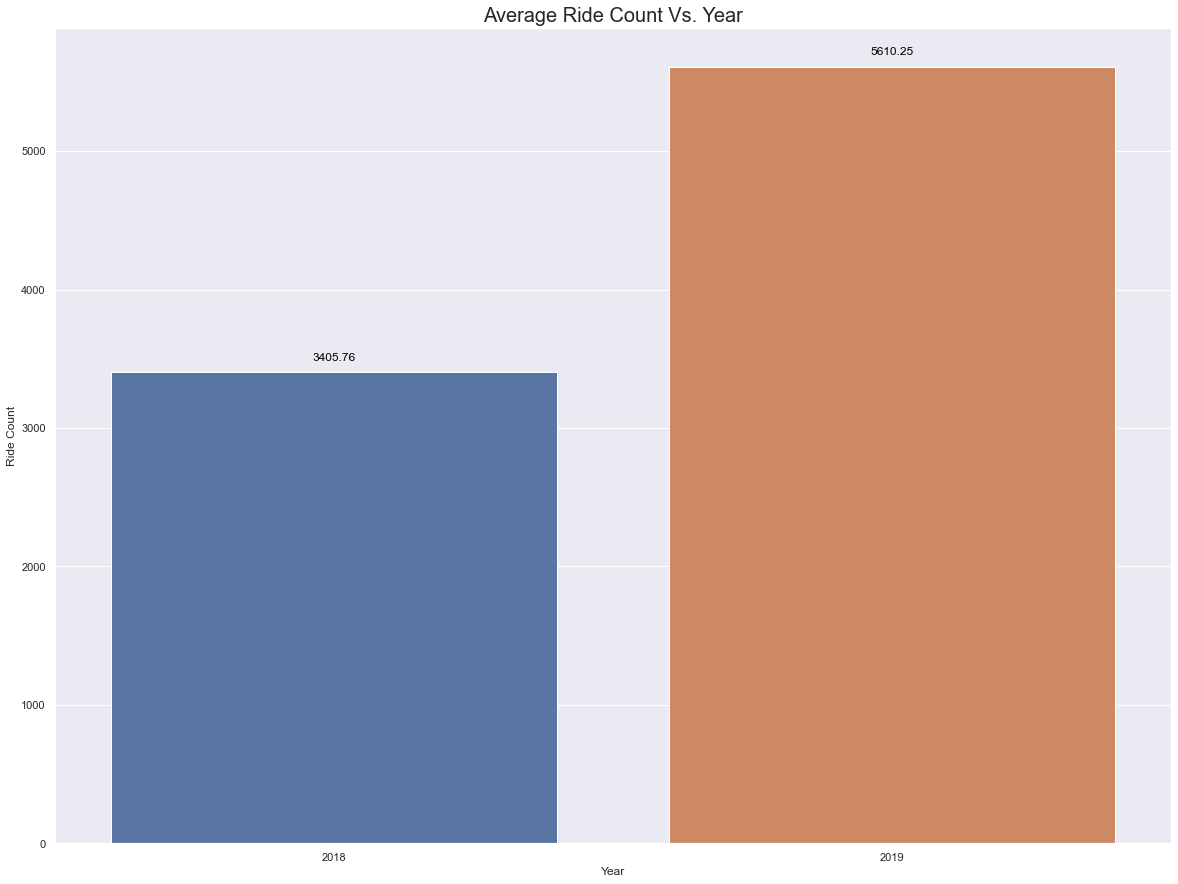

In [105]:
bar_graph_plot_function(data=year_dist, graph_title='Average Ride Count Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2018', '2019'])

We see that, Ride Count has increases comparatively in 2019 as compared to 2018. 


In [106]:
## Visualize dist by month
bike_pred_dup.mnth.describe()


NameError: name 'raw_data' is not defined

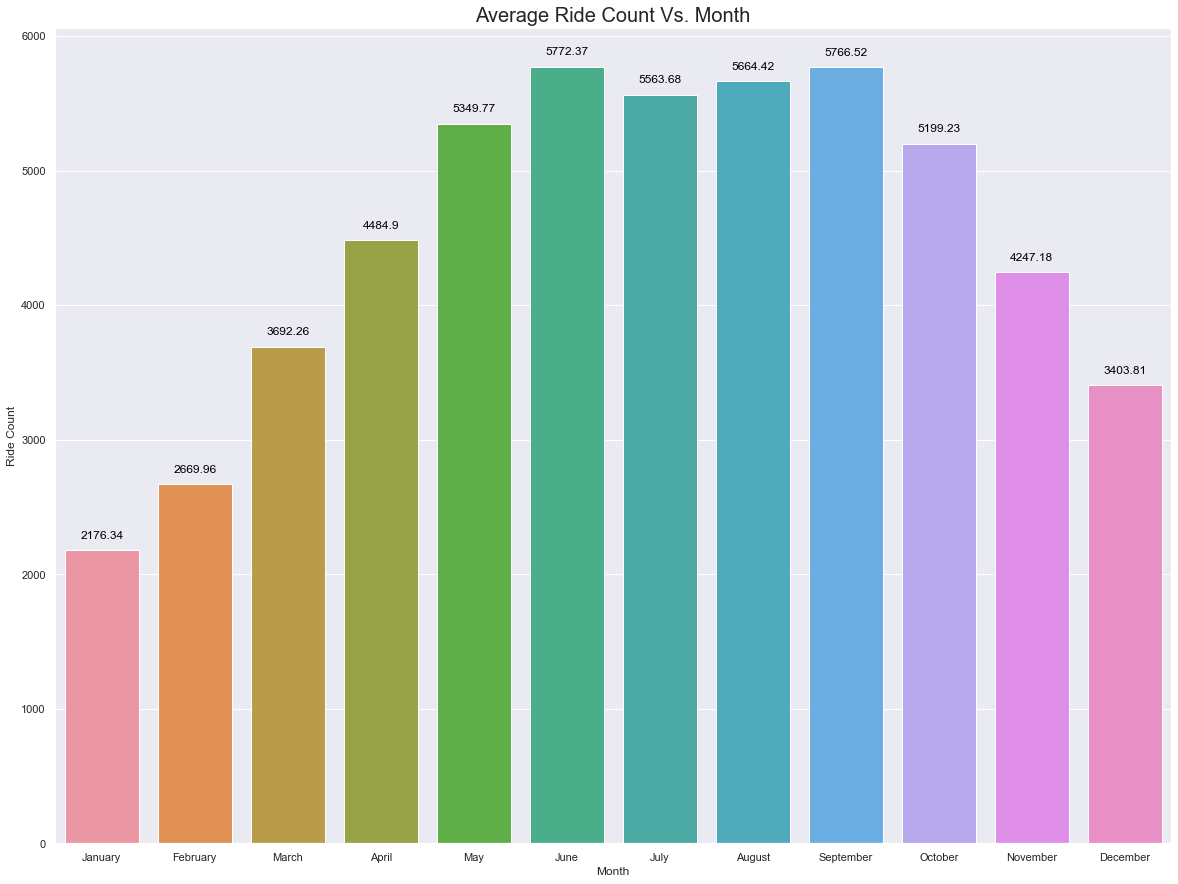

In [109]:
month_dist = bike_pred_dup.groupby(by='mnth').cnt.mean()
bar_graph_plot_function(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

In [112]:
## Mapping numbers to respective Month Name

bike_pred_dup.mnth = bike_pred_dup.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))


TypeError: an integer is required (got type str)

In [114]:
## 3.5 Holiday

bike_pred_dup.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

In [116]:
holiday_dist = bike_pred_dup.groupby(by='holiday').cnt.mean()


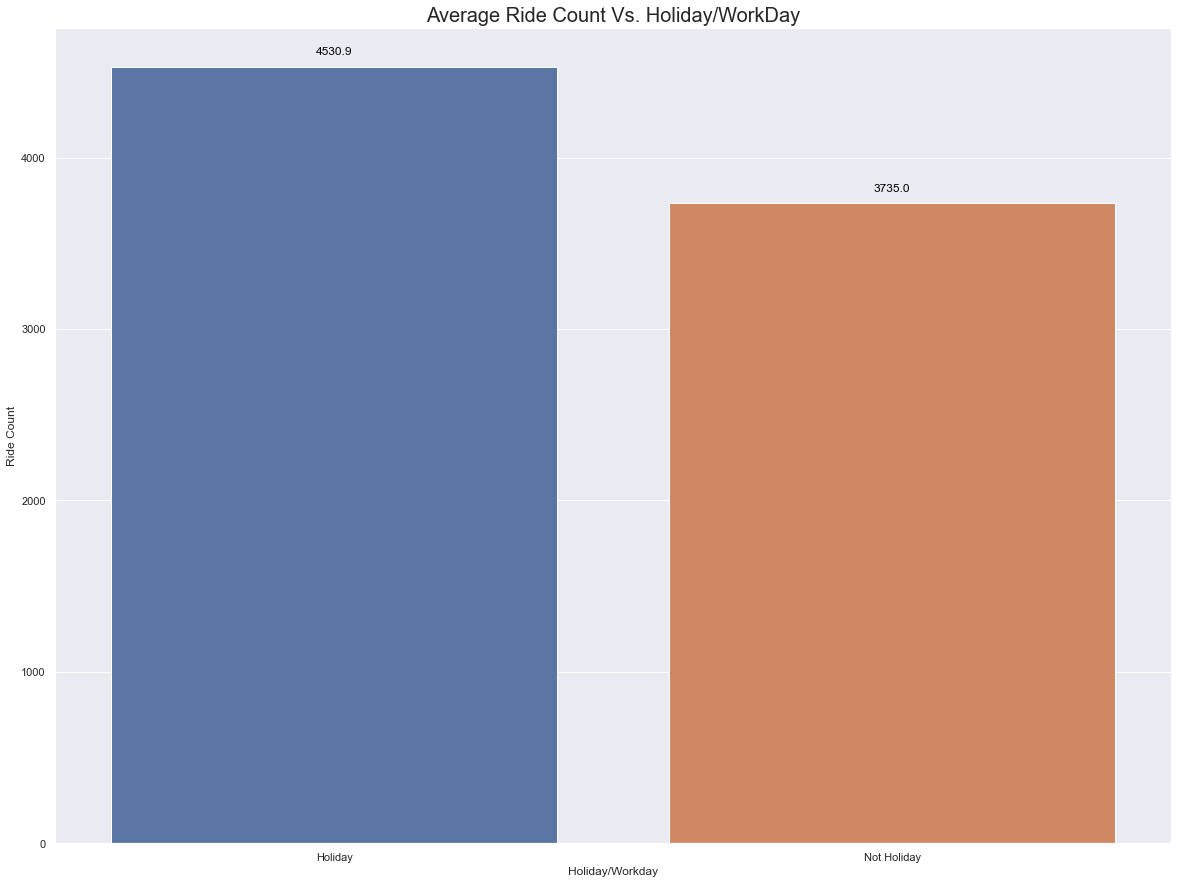

In [117]:
bar_graph_plot_function(data=holiday_dist, graph_title='Average Ride Count Vs. Holiday/WorkDay', x_axis_label='Holiday/Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Not Holiday'])

## Weekday

In [119]:
bike_pred_dup.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [ ]:
bike_pred_dup.groupby(by='weekday').weekday.count()

#### Let's plot distrubution of Ride Count Mean Across the days of weeks (Ex. Sunday, Monday etc.)

In [123]:
weekday_dist = bike_pred_dup.groupby(by='weekday').cnt.mean()


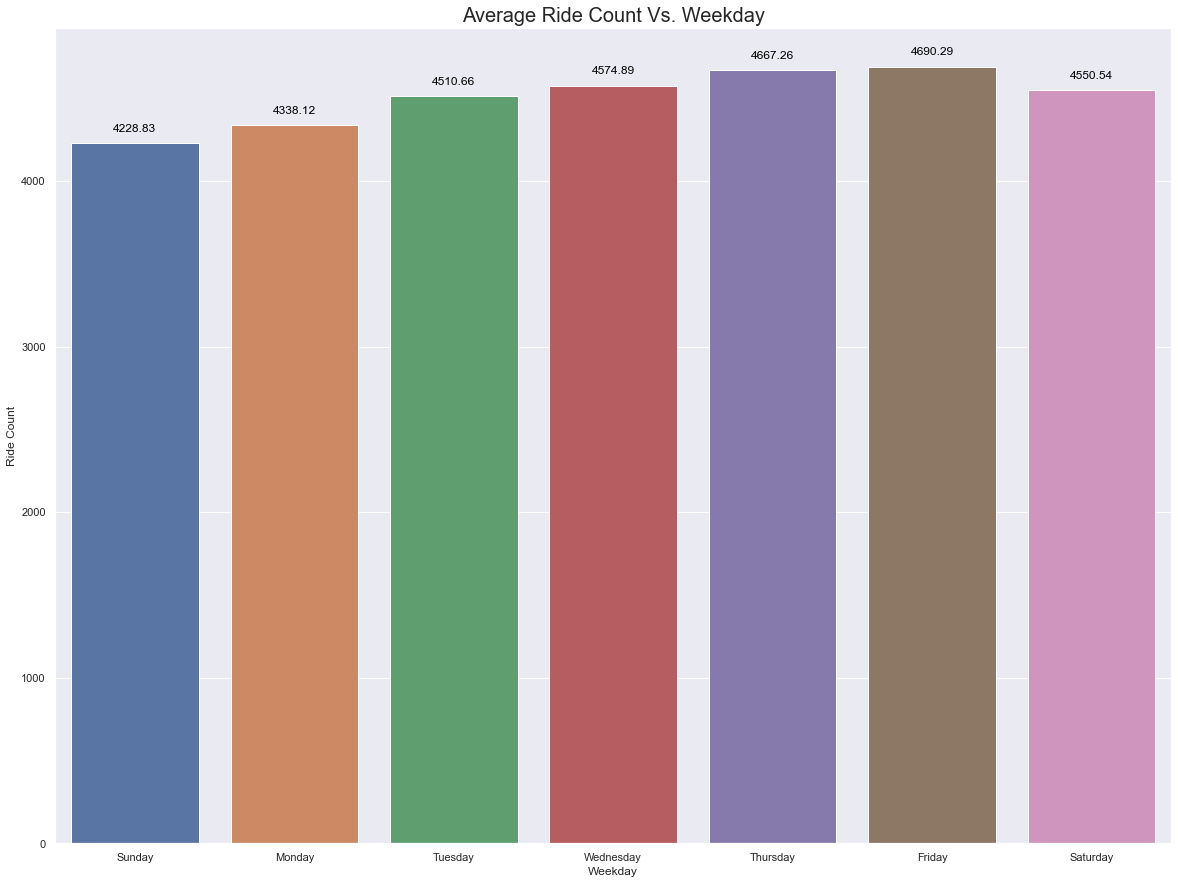

In [124]:
bar_graph_plot_function(data=weekday_dist, graph_title='Average Ride Count Vs. Weekday', x_axis_label='Weekday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

### Weather Situation


In [126]:
bike_pred_dup.weathersit.describe()


count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [128]:
bike_pred_dup.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)


weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

In [132]:
bike_pred_dup['weathersit'] = bike_pred_dup.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
bike_pred_dup.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)


Series([], Name: weathersit, dtype: int64)

In [134]:
weathersit_dist = bike_pred_dup.groupby(by='weathersit').cnt.mean()


In [136]:
bar_graph_plot_function(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

ValueError: min() arg is an empty sequence

## 4. Data Transformation (Using One Hot Encoder Method)
Following Columns are Categorical Nominal Variables which needs to encoded using One Hot Encoder Method (i.e. Creating Dummy Variables):
- Month
- Season
- Weekday
- Weather Situation

In [138]:
dummy_variables_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [141]:
status = pd.get_dummies(bike_pred_dup[dummy_variables_columns], drop_first=True)
status.head()

,weekday,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
instant,,,,,,,,,,,,
1,6,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0
4,2,0,0,0,1,0,0,0,0,0,0,0
5,3,0,0,0,1,0,0,0,0,0,0,0


In [142]:
bike_pred_dup = pd.concat([bike_pred_dup, status], axis=1)

In [144]:
bike_pred_dup = bike_pred_dup.drop(columns=dummy_variables_columns)

## Splitting into Train/Test set
### Splitting the dataset into TRAIN-TEST SET (70:30 ratio)

In [20]:
# Checking the shape of dataset before splitting

bike_pred_new.shape


(730, 30)

In [148]:
# Using the train_test_split method for achieving train and test dataset

df_train, df_test = train_test_split(bike_pred_new, train_size=0.70, test_size=0.30, random_state=0)

In [150]:
# Checking the shape of train set

df_train.shape


(510, 30)

In [149]:
# Checking the shape of test set

df_test.shape


(219, 30)

## Data Transformation (Scaling)

In [153]:
numerical_variables = ['temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()

In [154]:
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,31.53460,0.488399,0.527988,0.587667,0,1,...,0,0,0,0,1,0,0,0,0,0
524,1,0,0,0.802869,32.41835,0.254640,0.255430,0.860101,1,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,0.089497,7.54415,0.301044,0.647940,0.159227,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,33.90190,0.557424,0.281887,0.568799,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,0.810494,32.51355,0.527842,0.274080,0.833180,0,1,...,0,0,0,0,1,0,0,0,0,0


## Exploratory Data Analysis

### Making a Pairplot for the Numerical cols.

In [25]:
# Checking for the numerical columns

bike_pred_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

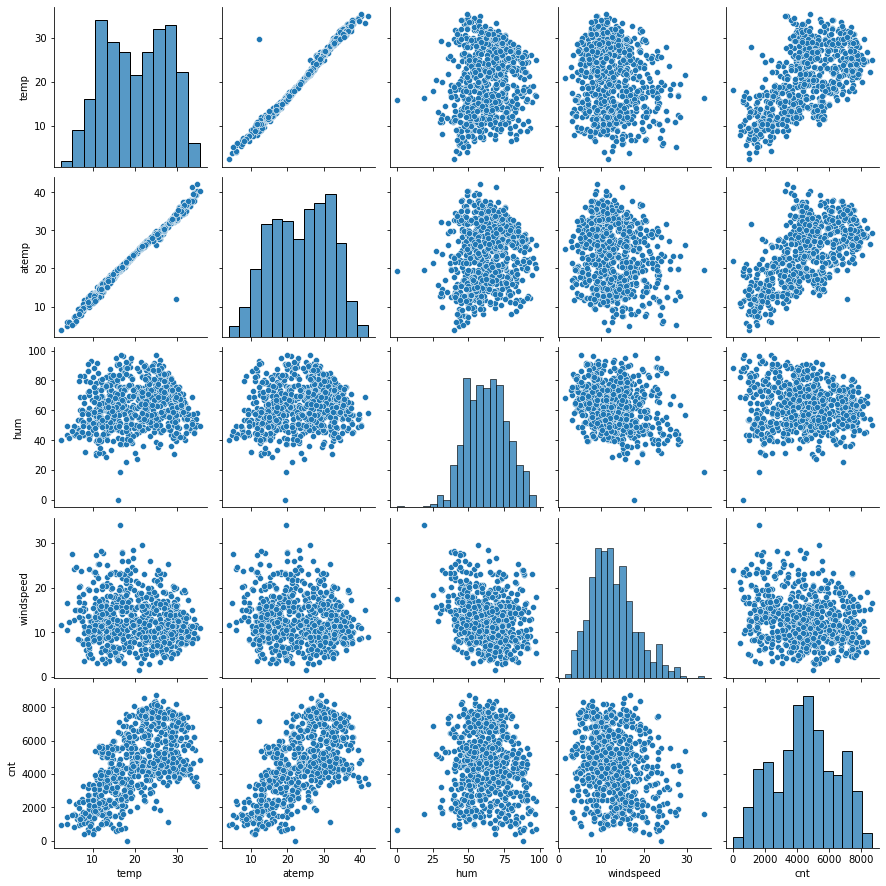

In [26]:
# Creating a pairplot using the numerical columns

bike_pred_num = bike_pred_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_pred_num)
plt.show()

## Insight:
### From the pairplots we can clearly conclude that there is a relation among 'temp', 'atemp' & 'cnt'.
### Making boxplots for the categorical variables.

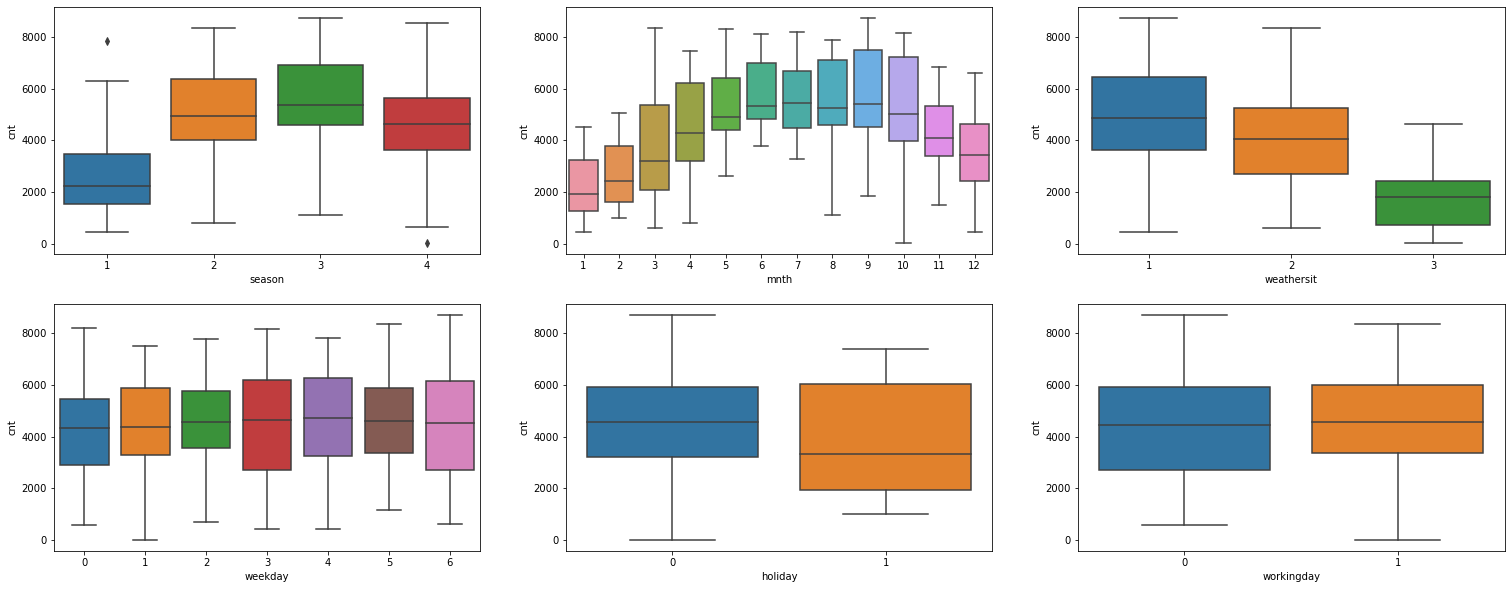

In [27]:
# Building boxplots for each categories with the help of subplots.

# We'll be using 'cnt' as target variable and all the categories as independent variables.

plt.figure(figsize=(26,10))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_pd)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike_pd)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bike_pd)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike_pd)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike_pd)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_pd)

plt.show()

Insight:
- From the "Season" boxplot we can see that almost 5000 bookings are from the season_3 compared to the other seasons.
- From the "Mnth" boxplot we can see that the months are following a trend and could be a good predictor variable. The bookings in the mid-month are above 4000.
- From the "Weathersit" boxplot we can say that maximum bookings happened in the weather 1 and it has some trends during the course of 2 years and it can be a good predictor variable for predicting the demand for the bikes.
- From the "Weekday" boxplot we can see that there seems no trend in the weekday dataset thus we can leave this variable for the prediction.
- From the "holiday" Almost most of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
- From the "Workingday" boxplot we can see that maximum bookings happening between 4000 and 6000.

### Correlation Matrix

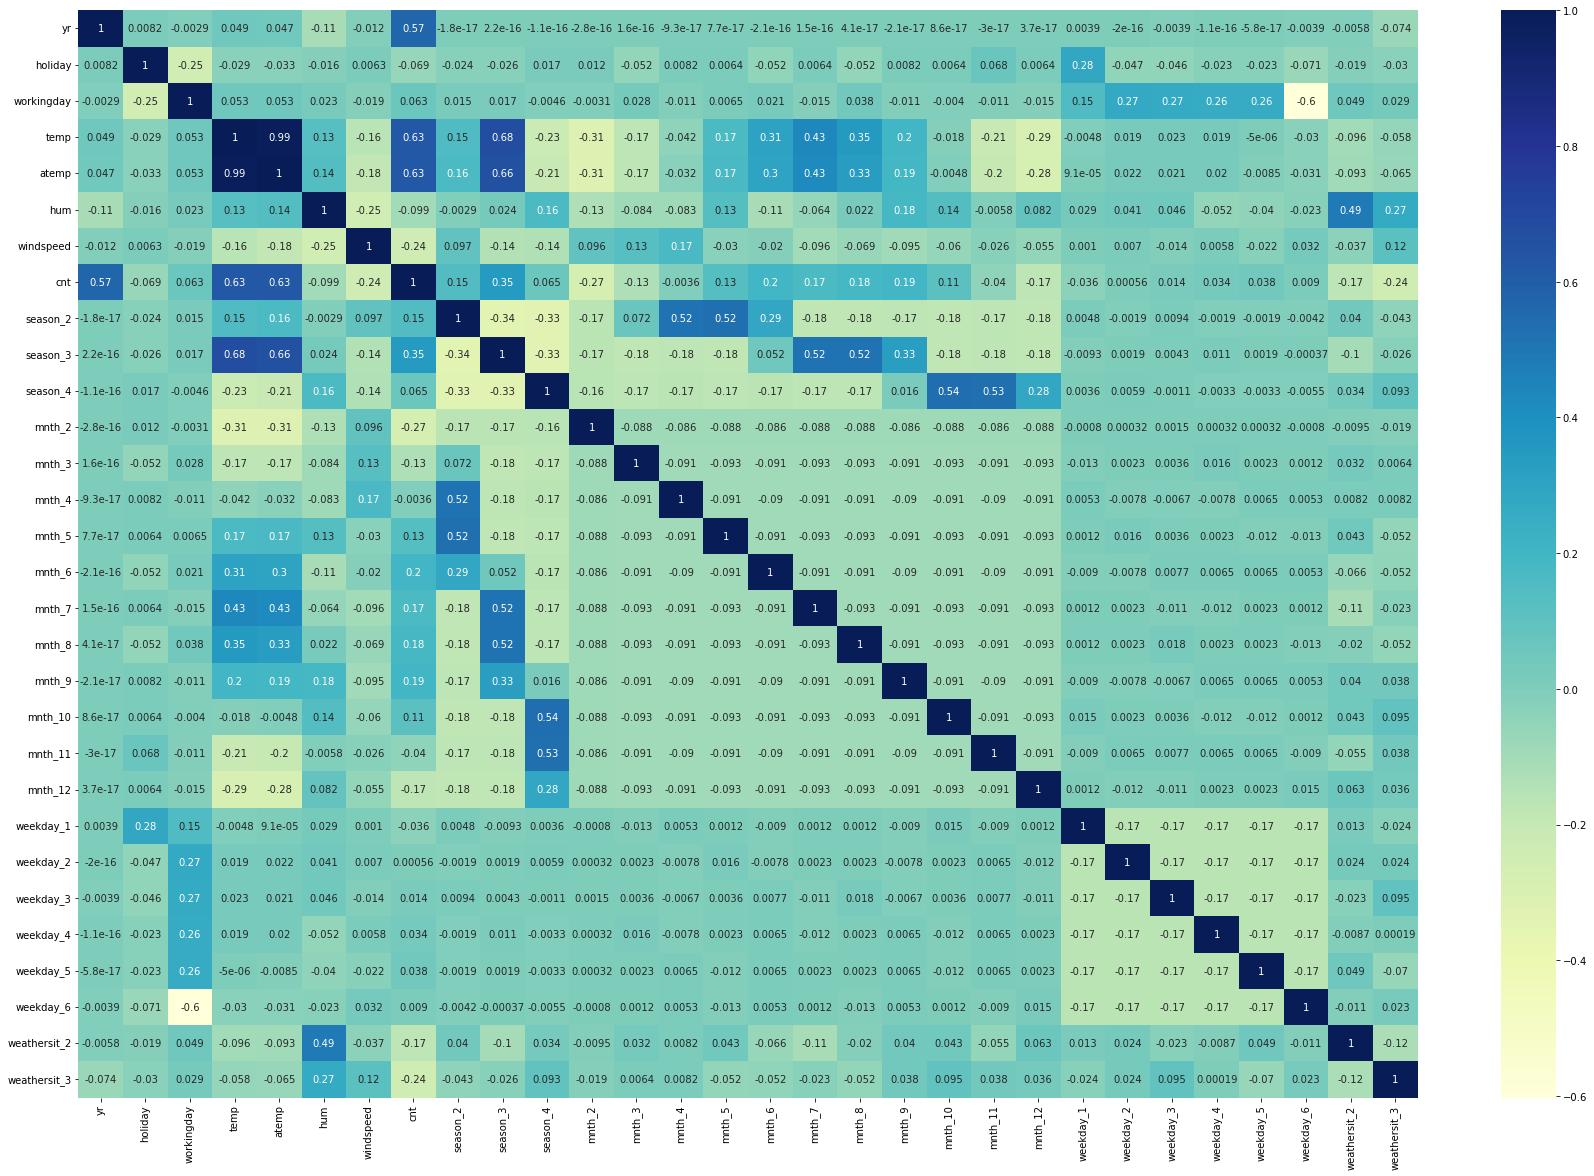

In [30]:
# Checking for the correlation among different variables with the help of heatmap.

plt.figure(figsize=(30,20))

sns.heatmap(bike_pred_new.corr(), annot=True, cmap='YlGnBu')

plt.show()

Insight:
- From the heatmap of the different variables of this dataset we can conclude that there seems high collinearity between some of the variables such as 'cnt, temp', 'season_3, temp', 'temp, atemp'.

## Rescaling Features

In [33]:
# Instantiating the object

scaler = MinMaxScaler()

In [155]:
# Looking the dataset before scaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0,1,0,...,0,0,0,0,1,0,0,0,0,0
524,1,0,0,0.802869,0.755332,0.254640,0.255430,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,1,0,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
# Creating a list of numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [36]:
# Using the scaler() function in the numeric variables

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [37]:
# Checking the dataset after scaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0.587667,0,1,...,0,0,0,0,1,0,0,0,0,0
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,1,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,1,...,0,0,0,0,1,0,0,0,0,0


In [38]:
# Descriptive statistics

bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.690196,0.515088,0.510792,0.514523,0.373755,0.513956,0.258824,0.256863,...,0.080392,0.082353,0.145098,0.143137,0.154902,0.141176,0.135294,0.145098,0.335294,0.023529
std,0.500491,0.169124,0.462867,0.243011,0.227658,0.194619,0.192867,0.217056,0.438419,0.437332,...,0.272166,0.275172,0.352545,0.350557,0.362166,0.348545,0.342373,0.352545,0.472557,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.311891,0.361513,0.232054,0.365221,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.503362,0.514074,0.513631,0.353541,0.521859,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734800,0.704145,0.651342,0.483991,0.670156,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building the Linear Model

In [40]:
# Dividing the Target var. & Independent var. into X and y for building the linear model

y_train = df_train.pop('cnt')
X_train = df_train

### RFE : Recursive Feature Elimination

In [56]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
13,mnth_5,True,1
12,mnth_4,True,1
11,mnth_3,True,1
9,season_4,True,1
28,weathersit_3,True,1
7,season_2,True,1


RFE method has successfully evaluated top 15 predictors which will impact our outcome.
But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

## Model Building Process - 1

In [59]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          9.31e-175
Time:                        06:34:09   Log-Likelihood:                 497.61
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     494   BIC:                            -895.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2117      0.022      9.613      0.000       0.168       0.255
yr               0.2201      0.008     26.306      0.000       0.204       0.236
temp            -0.1177      0.242     -0.486      0.627      -0.594       0.358
atemp            0.6047      0.254      2.379      0.018       0.105       1.104
hum             -0.2301      0.025     -9.222      0.000      -0.279      -0.181
windspeed       -0.1301      0.024     -5.321      0.000      -0.178      -0.082
season_2         0.1042      0.021      5.074      0.000       0.064       0.145
season_3         0.0799      0.024      3.388      0.001       0.034       0.126
season_4         0.1471      0.015      9.992      0.000       0.118       0.176
mnth_3           0.0501      0.016      3.066      0.002       0.018       0.082
mnth_4           0.0276      0.022      1.262      0.208      -0.015       0.071
mnth_5           0.0712      0.021      3.356      0.001       0.030       0.113
mnth_8           0.0483      0.019      2.608      0.009       0.012       0.085
mnth_9           0.1186      0.018      6.478      0.000       0.083       0.155
mnth_10          0.0623      0.018      3.390      0.001       0.026       0.098
weathersit_3    -0.1406      0.030     -4.747      0.000      -0.199      -0.082
==============================================================================
Omnibus:                       88.660   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.078
Skew:                          -0.882   Prob(JB):                     1.62e-48
Kurtosis:                       5.691   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
- Standard Errors assume that the covariance matrix of the errors is correctly specified.
- The smallest eigenvalue is 2.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

In [60]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,atemp,1057.62
1,temp,1033.18
2,season_3,8.45
3,hum,8.09
4,season_2,6.47
5,windspeed,3.53
6,season_4,3.02
7,mnth_4,2.51
8,mnth_5,2.29
9,yr,1.97


In the above model we see that P-Value of "Holiday" feature is more than 0.05, which make its co-efficient insignificant.
So, we will proceed ahead with dropping this feature and designing model again.

### 9.3. Model Building Process - 2

In [158]:
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [157]:
# Dropping Holiday feature and designing model again
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

KeyError: "['holiday'] not found in axis"